#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 
4. Write your names here: 
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [64]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    X= (np.array(X)).astype(np.float) #convert to float type
    if X.ndim == 1: #for 1D array, no need of for loop
      col = 1
      mean = np.mean(X)
      sigma = np.std(X)
      X = (X-mean)/sigma #assuming gaussian distribution
    else:
      col = np.shape(X)[1]
      for i in range(col): #iterate over all columns in X
        mean = np.mean(X[:,i])  
        sigma = np.std(X[:,i])
        X[:,i] = (X[:,i]-mean)/sigma #assuming gaussian distribution for each column
    return X
    raise NotImplementedError()

In [65]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [66]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    X_col = X.shape[1]
    w_len = len(w)
    for i in range(w_len - X_col): #if there are non-zero bias weights present in w, then add equivalent number of 'ones' columns in X
      X = np.c_[X, np.ones(X.shape[0])]

    return np.dot(X, w) #y = w[X]
    raise NotImplementedError()


In [67]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [68]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    y = Prediction(X,w) #prediction value
    mse = (np.sum((y-t)**2))/(y.size) #mse is the average/mean of square of error in predicted and target value
    return mse
    raise NotImplementedError()

In [69]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [70]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    y = Prediction(X,w) #prediction value
    mae = (np.sum(np.absolute(y-t)))/(y.size) #mae is mean/avaerage of absolute value of error between predicted and actual value
    return mae
    raise NotImplementedError()

In [71]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [72]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    mse = MSE_Loss(X, t, w) #mse loss
    mse_L2 = mse + (lamda * np.sqrt(np.sum(w[:-1]**2))) #L2 regularization is lamda times sum of square weight vectors without bias
    return mse_L2
    raise NotImplementedError()

In [73]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [74]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    mse = MSE_Loss(X, t, w) #mse loss
    mse_L1 = mse + (lamda * (np.sum(np.absolute(w[:-1])))) #L1 regularization is lamda times sum of absolute weight vectors without bias
    return mse_L1
    raise NotImplementedError()

In [75]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [76]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    mse = MSE_Loss (X, t, w) #mse loss
    y = Prediction(X,w) #predicted values
    nrmse = np.sqrt(mse)/np.std(t) #normalised mean square error
    return nrmse
    raise NotImplementedError()

In [77]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [78]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    # reference for formula: https://math.stackexchange.com/questions/1962877/compute-the-gradient-of-mean-square-error
    y = Prediction(X,w) #predicted value
    e = t - y #error differenc in target and predicted value

    X_col = X.shape[1]
    w_len = len(w)

    for i in range(w_len - X_col): 
      #if there are non-zero bias weights present in w, then add equivalent number of 'ones' columns in X
      X = np.c_[X, np.ones(X.shape[0])]

    grad = -2* np.dot((np.transpose(X)),e)/y.size #gradient = (X'.e)/n
    
    return grad
    raise NotImplementedError()

In [79]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [80]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    y = Prediction(X,w)
    X_col = X.shape[1]
    w_len = len(w)
    for i in range(w_len - X_col):
      #if there are non-zero bias weights present in w, then add equivalent number of 'ones' columns in X
      X = np.c_[X, np.ones(X.shape[0])]

    grad_y = -0.5*np.sign(t-y) #grad w.r.t. y = - sigmoid function of error/2
    grad_w = np.dot(grad_y, X) #grad w.r.t weight = (grad w.r.t. y).X
    return grad_w
    raise NotImplementedError()

In [81]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [82]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse_grad = MSE_Gradient(X,t,w) #mse gradient
    l2_penalty = lamda*np.append((w[:-1]),0)/np.sqrt(np.sum(w[:-1]**2)) #gradient of L2 regularisation term = w/sqrt(sum of square of w)
    
    return mse_grad + l2_penalty #L2 gradient = mse gradient + gradient of L2 regularisation term
    raise NotImplementedError()

In [83]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [84]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse_grad = MSE_Gradient(X,t,w) #mse gradient
    l1_penalty = lamda * np.sign(np.append(w[:-1],0)) #gradient of L1 regularisation term = sigmoid function of w
    
    return (mse_grad + l1_penalty) #L1 gradient = mse gradient + gradient of L1 regularisation term
    raise NotImplementedError()

In [85]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [86]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE

    #Initialize losses
    current_loss = 0
    previous_loss = 0

    for i in range(max_iter): #iterate upto maximum iterations
      current_loss = lossfunc(X, t, w, lamda) #calculate present loss
      #print(current_loss)
      if (previous_loss and abs(current_loss - previous_loss) <= epsilon): #early stopping of training function if error terms are constant upto epsilon value
        break
      previous_loss = current_loss
      w = w - lr * gradfunc(X, t, w, lamda) #updation of weights 

    w_final = w
    train_loss_final = lossfunc(X, t, w, lamda) #calculation of training loss


    validation_loss_final = lossfunc(X_val, t_val, w, lamda) #calculation of validation loss
    validation_NRMSE = NRMSE_Metric(X_val, t_val, w, lamda) #calculation of NRMSE metric

    #print(i)
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    raise NotImplementedError()
    
    

In [87]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
print(results)
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

(array([1.40919402, 0.34000408, 0.9307617 ]), 705.3173136659046, 24.43506990649552, 9.856998891856357)


## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [88]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    X = np.c_[X, np.ones(X.shape[0])] #append one extra column (each element equal one) for bias 
    X_col = X.shape[1]

    w = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(X),X)+ lamda*np.identity(X.shape[1]))),np.transpose(X)),t) #weight calculation using equation: w = (X' X + lambda I)^(-1) X' t.
    return w
    raise NotImplementedError()

In [89]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [90]:
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv") #read the training data

In [91]:
#randomizing the dataset before splitting into train and test
np.random.seed(0) #seed for fixing random values
msk = np.random.rand(len(df)) < 0.8 #create mask of 80% values randomly sampled from train data file

# splitting dataframe into train and test
train = df[msk] #use 80% mask to separate training data
test = df[~msk] #use invereted mask to separate remaining data for testing

In [92]:
# train = df[:4861]
# test = df[4861:]

In [93]:
train #training data visualisation as dataframe

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,24.1,17.9,98.194176,99.427292,17.835558,14.791082,20.113253,30.171732,0.732895,0.954414,0.983789,0.899487,0.829557,2.535310,5.512385,2.187634,37.6181,127.004,146.5540,4.7296,4515.370117,19.5
6078,24.4,19.7,79.676888,90.329170,20.957463,17.063541,13.844681,95.444412,0.787284,0.901921,0.920533,0.667988,0.297791,1.894275,5.737044,1.002951,37.5102,127.086,21.9668,0.1332,4401.705566,21.4
6079,24.8,19.9,82.331352,90.905838,20.804890,16.927768,14.502989,85.178889,0.769457,0.949824,0.966691,0.811649,0.413629,1.465975,4.861343,0.750402,37.5372,126.891,15.5876,0.1554,4403.272949,21.2
6080,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,0.947244,0.955192,0.784297,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672,21.1


In [94]:
#separating input and output values of model for test and train dataframe

#and removing the title bar from data
X_train = train.drop('Next_Tmax', axis=1) 
y_train = train['Next_Tmax'] 

X_test = test.drop('Next_Tmax', axis=1) 
y_test = test['Next_Tmax'] 


In [95]:
X_train #input train vector dataframe

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,24.1,17.9,98.194176,99.427292,17.835558,14.791082,20.113253,30.171732,0.732895,0.954414,0.983789,0.899487,0.829557,2.535310,5.512385,2.187634,37.6181,127.004,146.5540,4.7296,4515.370117
6078,24.4,19.7,79.676888,90.329170,20.957463,17.063541,13.844681,95.444412,0.787284,0.901921,0.920533,0.667988,0.297791,1.894275,5.737044,1.002951,37.5102,127.086,21.9668,0.1332,4401.705566
6079,24.8,19.9,82.331352,90.905838,20.804890,16.927768,14.502989,85.178889,0.769457,0.949824,0.966691,0.811649,0.413629,1.465975,4.861343,0.750402,37.5372,126.891,15.5876,0.1554,4403.272949
6080,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,0.947244,0.955192,0.784297,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672


In [96]:
#converting dataframe to numpy for faster computation
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [97]:
X_train_org = X_train #storing original copy of training data

In [98]:
print(f"{min(y_train)} , {max(y_train)}") #max and minimum output balues

17.4 , 38.9


In [99]:
#Normalising the input training vectors:
#X_train =X_train/(np.linalg.norm(X_train))
#X_train /=  X_train.sum(axis=1)[:,np.newaxis]

X_train = Normalize(X_train) #normalise the input training vector
X_train

array([[-0.36556423, -0.70069952,  0.15284963, ...,  2.76412893,
         1.11157198,  1.50241305],
       [ 0.71963658, -0.61779842, -0.26126598, ..., -0.31976555,
        -0.54887752,  1.21619414],
       [ 0.61789901,  0.08686091, -0.50818344, ..., -0.53058677,
        -0.73021156,  1.20286133],
       ...,
       [-1.68815273, -1.32245776,  1.81667228, ..., -0.85667912,
        -0.81115381, -2.17914801],
       [-1.68815273, -1.32245776,  1.63614095, ..., -0.82524623,
        -0.76223749, -2.19074948],
       [-1.89162788, -1.40535885,  1.52731968, ..., -0.78312468,
        -0.7264094 , -2.16038143]])

In [100]:
#X_test =X_test/(np.linalg.norm(X_test))
#X_test /=  X_test.sum(axis=1)[:,np.newaxis]

#normalise the testing data using the mean and sigma of training data
#assuming that the distribution of test data is unknown beforehand
col = np.shape(X_train)[1]
for i in range(col):
  mean = np.mean(X_train_org[:,i]) #mean of train data
  sigma = np.std(X_train_org[:,i]) #sigma of training data
  X_test[:,i] = (X_test[:,i]-mean)/sigma #normalisation of test data assuming gaussian distribution same as train data

In [101]:
X_train.shape #verifying shape of train data

(4878, 21)

In [102]:
X_test.shape #verifying shape of train data

(1204, 21)

In [103]:
X_test #visualisation of testing data after normalisation

array([[ 0.78746163,  0.21121256, -0.25692459, ..., -0.17703665,
         0.21798999,  1.20387231],
       [ 0.55007396, -0.45199623, -0.04873147, ..., -0.20623906,
        -0.62316598,  1.23376992],
       [ 0.51616143,  0.29411365, -0.36614867, ..., -0.57362849,
        -0.47290733,  1.18987795],
       ...,
       [-2.40031576, -2.98047972,  1.29171839, ...,  2.69368097,
         2.86144548, -2.34995839],
       [-2.06119051, -2.31727093,  1.43927059, ...,  0.37088948,
         0.72616402, -2.26678834],
       [-1.99336546, -1.36390831,  1.81004735, ..., -0.65957206,
        -0.50646875, -2.1495399 ]])

In [104]:
def Gradient_Descent2 (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc, trainlossfunc, vallossfunc): # See output format in 'return' statement
    # YOUR CODE HERE

    current_loss = 0
    previous_loss = 0
    for i in range(max_iter): #iterate upto maximum iterations
      current_loss = lossfunc(X, t, w, lamda) #calculate present loss
      #print(current_loss)
      if (previous_loss and abs(current_loss - previous_loss) <= epsilon): #early stopping of training function if error terms are constant upto epsilon value
        break
      previous_loss = current_loss
      w = w - lr * gradfunc(X, t, w, lamda) #updation of weights

    w_final = w
    
    train_loss_final = trainlossfunc(X, t, w, lamda) #calculation of training loss

    validation_loss_final = vallossfunc(X_val, t_val, w, lamda) #calculation of validation loss
    validation_NRMSE = NRMSE_Metric(X_val, t_val, w, lamda) #calculation of NRMSE metric

    #print(i)
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    raise NotImplementedError()
    

Part B - (3) Find the best lamda for MSE+lamda*L2(w) loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.

lamda: 0.05 , training_loss: 1.402410935879989 , validation_loss: 1.4395860095013837 , validation_NRMSE: 0.47544027133220695, weights: 
lamda: 0.03333333333333333 , training_loss: 1.401684131269936 , validation_loss: 1.4393835773809394 , validation_NRMSE: 0.47537341573508723, weights: 
lamda: 0.022222222222222223 , training_loss: 1.4012510992390808 , validation_loss: 1.4393010441932692 , validation_NRMSE: 0.475346158175705, weights: 
lamda: 0.014814814814814815 , training_loss: 1.400986760593118 , validation_loss: 1.4392706167989493 , validation_NRMSE: 0.47533610916959085, weights: 
lamda: 0.009876543209876543 , training_loss: 1.4008217984591083 , validation_loss: 1.4392616544120769 , validation_NRMSE: 0.47533314923554154, weights: 
lamda: 0.006584362139917695 , training_loss: 1.400716962369786 , validation_loss: 1.4392608290954483 , validation_NRMSE: 0.4753328766649836, weights: 
lamda: 0.0043895747599451305 , training_loss: 1.40064939511064 , validation_loss: 1.4392626026240458 , val

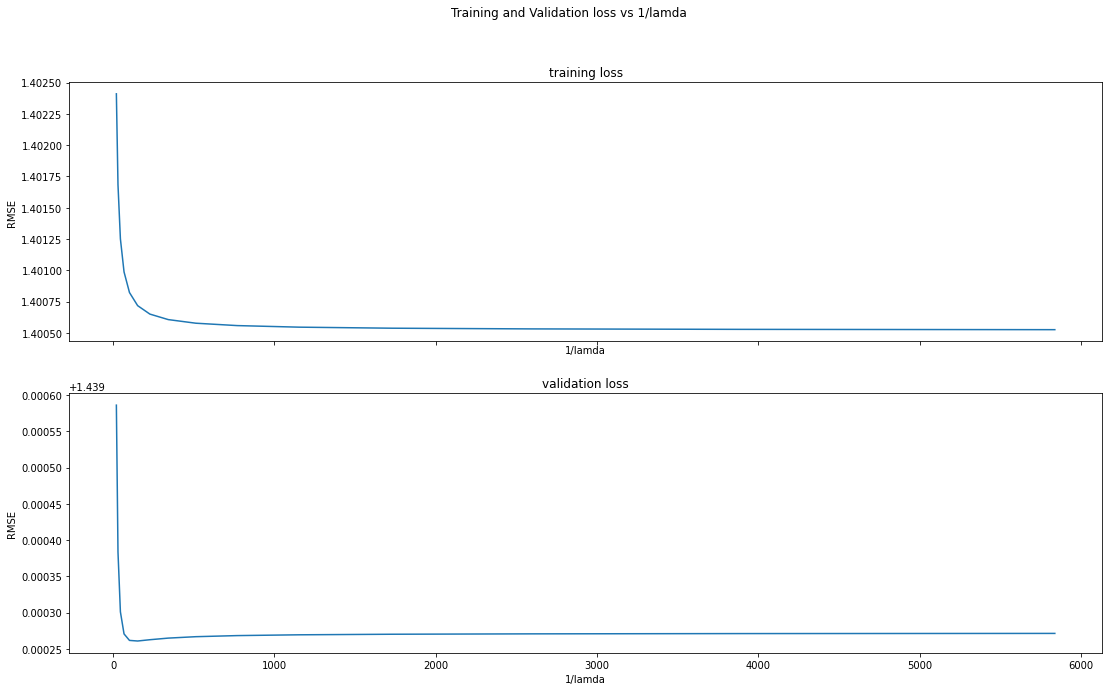

Minimum value of validation loss: 1.4392608290954483


In [105]:
max_iter = 100

#loss functions to be used for verifying accuracy of model
lossfunc = L2_Loss #loss function
gradfunc = L2_Gradient #gradient function
trainlossfunc = MSE_Loss #training loss calculation function
vallossfunc = MSE_Loss #validation loss calculation function

lr = 0.1 #learning rate

epsilon = 1e-10 #training stop error limit

#lists for storing the loss and weights for plotting the graph
train_loss = []
val_loss = []
l=[]
weights = []

#initialise weights of the Gradient Descent with unity vector
w = np.ones(X_train.shape[1]+1)

lamda = 0.5e-1 #regularisation coefficient initialisation

for j in range(15): #iterate over lamda values

  result = Gradient_Descent2(X_train, X_test, y_train, y_test, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc, trainlossfunc, vallossfunc)
  #argument: X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc
  #result: w_final, train_loss_final, validation_loss_final, validation_NRMSE

 # print(f'lamda: {lamda} , training_loss: {pres_train_loss}, validation_loss:{pres_val_loss}')
  print(f'lamda: {lamda} , training_loss: {np.sqrt(result[1])} , validation_loss: {np.sqrt(result[2])} , validation_NRMSE: {result[3]}, weights: ')

  train_loss.append(np.sqrt(result[1]))
  val_loss.append(np.sqrt(result[2]))
  l.append(lamda)
  lamda = lamda/1.5 #update lamda value
  weights.append(result[0])

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Training and Validation loss vs 1/lamda')
ax1.plot(np.reciprocal(l), train_loss, label = 'training loss')
ax2.plot(np.reciprocal(l),val_loss, label='validation loss')
ax1.set_title('training loss')
ax2.set_title('validation loss')
ax1.set_xlabel('1/lamda')
ax2.set_xlabel('1/lamda')
ax1.set_ylabel('RMSE')
ax2.set_ylabel('RMSE')
# ax1.xlabel('1/lamda')
# ax1.ylabel('Training Loss')
# ax2.xlabel('1/lamda')
# ax2.ylabel('Validation Loss')

# plt.figure(figsize=(21,8))
# #plt.plot(np.reciprocal(l), train_loss, label = 'training loss')
# plt.plot(np.reciprocal(l),val_loss, label='validation loss')
# plt.xlabel('1/lamda')
# plt.ylabel('Loss')
# plt.title('L2 loss')

#plt.legend()
plt.show()

print(f'Minimum value of validation loss: {np.min(val_loss)}')



In [106]:
#Best lamda : 0.0065 obtimised where validation loss is minimum
L2_lamda = 0.0065
w = np.ones(X_train.shape[1]+1)

#best weights
result = Gradient_Descent2(X_train, X_test, y_train, y_test, w, L2_lamda, max_iter, epsilon, lr, lossfunc, gradfunc, trainlossfunc, vallossfunc)
print( f'best lamda: 0.0065 , weights : {result[0]}')
#print(result)
L2_weights = result[0]

best lamda: 0.0065 , weights : [ 4.65408835e-01  1.29687568e-01  3.31379086e-01 -8.66075864e-02
  1.71999864e+00  3.28337916e-01 -4.17476118e-01  2.61556829e-01
 -3.12173947e-01 -2.44289642e-01 -1.22636860e-01 -2.39948239e-01
 -9.64908085e-02  2.00142244e-01  3.80681778e-03 -3.60166407e-02
 -5.40339203e-02 -1.23293521e-01 -2.29277370e-01  2.89500391e-01
  5.56470542e-02  3.02822058e+01]


Part 2 -(4) Find the best lamda for MSE+lamda*L1(w) loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.

lamda: 1 , training_loss: 1.607637456266449 , validation_loss: 1.604055031768816 , validation_NRMSE: 0.5297581071936812
lamda: 0.6666666666666666 , training_loss: 1.5809641928064115 , validation_loss: 1.5730788244774512 , validation_NRMSE: 0.5195278491179236
lamda: 0.4444444444444444 , training_loss: 1.5123240838378933 , validation_loss: 1.5193054300939788 , validation_NRMSE: 0.5017685509256697
lamda: 0.2962962962962963 , training_loss: 1.477338746542951 , validation_loss: 1.485928391354795 , validation_NRMSE: 0.49074538992682154
lamda: 0.19753086419753085 , training_loss: 1.4565048333014932 , validation_loss: 1.4736092688841573 , validation_NRMSE: 0.48667685432605995
lamda: 0.1316872427983539 , training_loss: 1.435285753399746 , validation_loss: 1.4555291300377797 , validation_NRMSE: 0.4807056750688907
lamda: 0.0877914951989026 , training_loss: 1.4228875819400104 , validation_loss: 1.4492558722059299 , validation_NRMSE: 0.478633857625524
lamda: 0.05852766346593507 , training_loss: 1.4

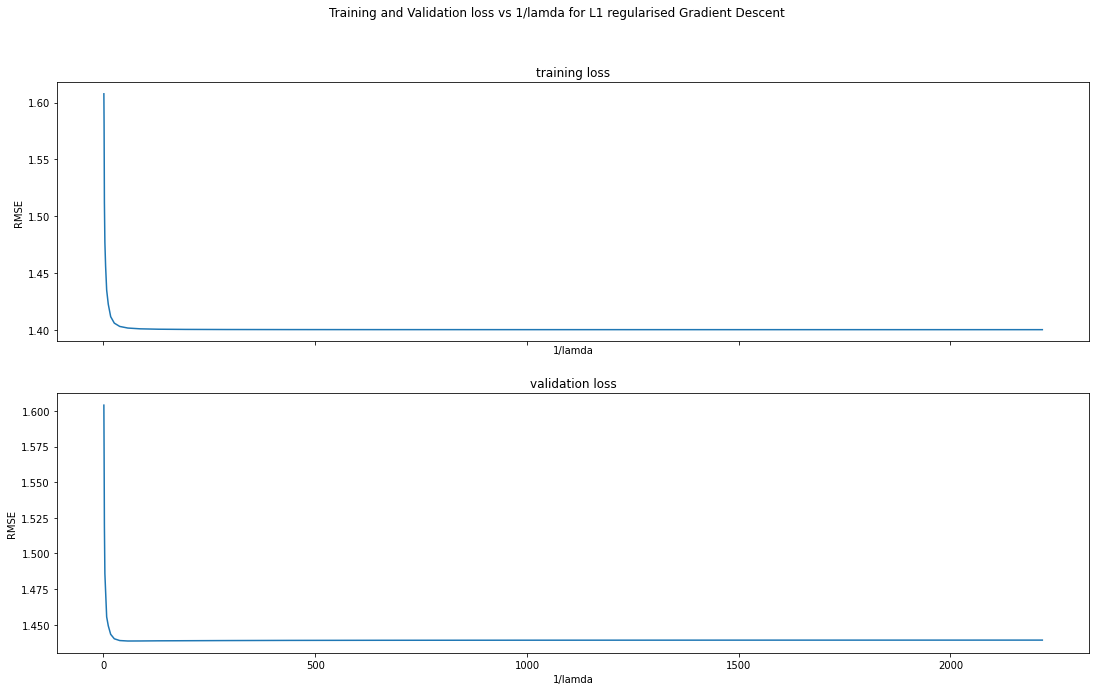

Minimum value of validation loss: 1.4385841464752496


In [107]:
max_iter = 100

#loss functions to be used for verifying accuracy of model
lossfunc = L1_Loss #loss function
gradfunc = L1_Gradient #gradient function
trainlossfunc = MSE_Loss #training loss calculation function
vallossfunc = MSE_Loss #validation loss calculation function

lr = 1e-1 #learning rate

epsilon = 1e-10 #training stop error limit

#lists for storing the loss and weights for plotting the graph
train_loss = []
val_loss = []
l=[]
weights = []

#initialise weights of the Gradient Descent with unity vector
w = np.ones(X_train.shape[1]+1)

#regularisation coefficient initialisation
lamda = 1

for j in range(20): #iterate over lamda values

  result = Gradient_Descent2(X_train, X_test, y_train, y_test, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc, trainlossfunc, vallossfunc)
  #argument: X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc
  #result: w_final, train_loss_final, validation_loss_final, validation_NRMSE

 # print(f'lamda: {lamda} , training_loss: {pres_train_loss}, validation_loss:{pres_val_loss}')
  print(f'lamda: {lamda} , training_loss: {np.sqrt(result[1])} , validation_loss: {np.sqrt(result[2])} , validation_NRMSE: {result[3]}')

  train_loss.append(np.sqrt(result[1]))
  val_loss.append(np.sqrt(result[2]))
  l.append(lamda)
  lamda = lamda/1.5 #update lamda factor
  weights.append(result[0])

#plot the validation vs 1/lamda curve
# plt.plot(np.reciprocal(l), train_loss, label = 'training loss')
# plt.plot(np.reciprocal(l),val_loss, label='validation loss')
# plt.xlabel('1/lamda')
# plt.ylabel('Loss')
# plt.title('L1 loss')

# plt.legend()
# plt.show()
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Training and Validation loss vs 1/lamda for L1 regularised Gradient Descent')
ax1.plot(np.reciprocal(l), train_loss, label = 'training loss')
ax2.plot(np.reciprocal(l),val_loss, label='validation loss')
ax1.set_title('training loss')
ax2.set_title('validation loss')
ax1.set_xlabel('1/lamda')
ax2.set_xlabel('1/lamda')
ax1.set_ylabel('RMSE')
ax2.set_ylabel('RMSE')

plt.show()

print(f'Minimum value of validation loss: {np.min(val_loss)}')



In [108]:
#Best lamda : 0.017 
L1_lamda = 0.017
w = np.ones(X_train.shape[1]+1)

#best weights
result = Gradient_Descent2(X_train, X_test, y_train, y_test, w, L1_lamda, max_iter, epsilon, lr, lossfunc, gradfunc, trainlossfunc, vallossfunc)
print( f'best lamda: 0.48 , weights : {result[0]}')
#print(result)
L1_weights = result[0]

best lamda: 0.48 , weights : [ 4.71420148e-01  1.26969417e-01  2.79920746e-01 -5.83297393e-02
  1.71874062e+00  3.27487454e-01 -4.06225960e-01  2.50434216e-01
 -3.08566093e-01 -2.23781361e-01 -1.03768577e-01 -2.36591570e-01
 -8.69429863e-02  1.82934781e-01 -1.46207316e-03 -2.93924839e-02
 -4.39818330e-02 -1.20960913e-01 -1.92550158e-01  2.52050972e-01
  4.38230508e-02  3.02822058e+01]


Part B - (5) Find the best lamda for the pseudo-inv method. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.

lamda: 100 , training_loss: 1.5282276028290946 , validation_loss: 1.553735961432839 , validation_NRMSE: 0.5131396402901249
lamda: 50.0 , training_loss: 1.4333121487225773 , validation_loss: 1.466596704151218 , validation_NRMSE: 0.4843608720524353
lamda: 25.0 , training_loss: 1.4078535024877972 , validation_loss: 1.4449775319222833 , validation_NRMSE: 0.4772208852488246
lamda: 12.5 , training_loss: 1.4013160412219077 , validation_loss: 1.440281010177563 , validation_NRMSE: 0.475669803508734
lamda: 6.25 , training_loss: 1.3996636010415038 , validation_loss: 1.4395207995356119 , validation_NRMSE: 0.4754187349713258
lamda: 3.125 , training_loss: 1.3992484699007672 , validation_loss: 1.4395437125558057 , validation_NRMSE: 0.47542630226669136
lamda: 1.5625 , training_loss: 1.3991444497533556 , validation_loss: 1.4396565764202558 , validation_NRMSE: 0.4754635768900786
lamda: 0.78125 , training_loss: 1.3991184160096584 , validation_loss: 1.4397384355518574 , validation_NRMSE: 0.475490611834488

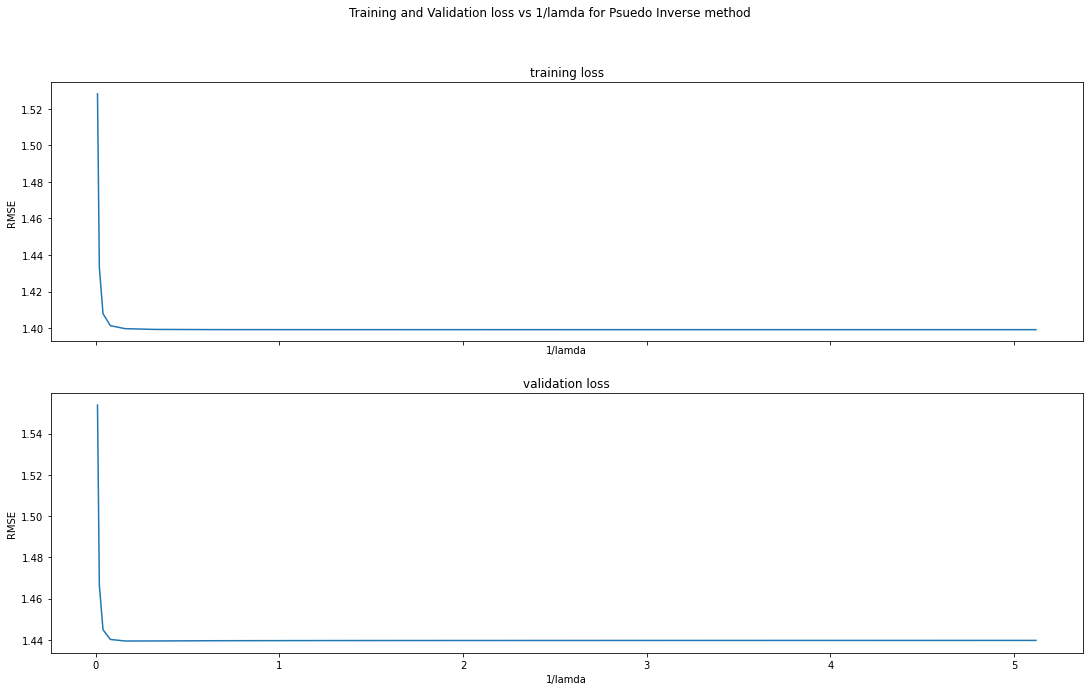

Minimum value of validation loss: 1.4395207995356119


In [109]:
#loss functions to be used for verifying accuracy of model
trainlossfunc = MSE_Loss
vallossfunc = MSE_Loss

#lists for storing the loss and weights for plotting the graph
train_loss = []
val_loss = []
l=[]
weights = []

#initialise weights of the Gradient Descent with unity vector
w = np.ones(X_train.shape[1]+1)

#regularisation coefficient initialisation
lamda = 100

for j in range(10): #iterate over lamda values

  w = Pseudo_Inverse(X_train,y_train,lamda) #calculation of weights using Pseudo inverse algorithm

  train_l = trainlossfunc(X_train, y_train, w, lamda) #calculation of training loss 

  validation_l = vallossfunc(X_test, y_test, w, lamda) #calculation of validation loss 
  validation_NRMSE = NRMSE_Metric(X_test, y_test, w, lamda) #calculation of validation NRMSE 

 # print(f'lamda: {lamda} , training_loss: {pres_train_loss}, validation_loss:{pres_val_loss}')
  print(f'lamda: {lamda} , training_loss: {np.sqrt(train_l)} , validation_loss: {np.sqrt(validation_l)} , validation_NRMSE: {validation_NRMSE}')

  train_loss.append(np.sqrt(train_l))
  val_loss.append(np.sqrt(validation_l))
  l.append(lamda)
  lamda = lamda/2 #updation of lamda value
  weights.append(w)

#plot loss vs 1/lamda curve
# plt.plot(np.reciprocal(l), train_loss, label = 'training loss')
# plt.plot(np.reciprocal(l),val_loss, label='validation loss')
# plt.xlabel('1/lamda')
# plt.ylabel('Loss')
# plt.title('Pseudo inverse loss')

# plt.legend()
# plt.show()
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Training and Validation loss vs 1/lamda for Psuedo Inverse method')
ax1.plot(np.reciprocal(l), train_loss, label = 'training loss')
ax2.plot(np.reciprocal(l),val_loss, label='validation loss')
ax1.set_title('training loss')
ax2.set_title('validation loss')
ax1.set_xlabel('1/lamda')
ax2.set_xlabel('1/lamda')
ax1.set_ylabel('RMSE')
ax2.set_ylabel('RMSE')

plt.show()

print(f'Minimum value of validation loss: {np.min(val_loss)}')


In [110]:
#Best lamda : 6.25 
PI_lamda = 6.25
w = Pseudo_Inverse(X_train,y_train,lamda)
print( f'best lamda: 6.25 , weights : {w}')
#print(result)
PI_weights = w

best lamda: 6.25 , weights : [ 4.86730897e-01  1.41192441e-01  4.69639141e-01 -1.11410487e-01
  1.88587144e+00  1.79334286e-01 -4.16527090e-01  2.46142174e-01
 -2.93176373e-01 -2.42969799e-01 -1.19038902e-01 -2.54245227e-01
 -1.02845539e-01  1.90270113e-01 -4.39005045e-03 -3.44288957e-02
 -6.22346236e-02 -1.27374511e-01 -2.22603893e-01  2.80086256e-01
  4.14585920e-02  3.02815996e+01]


# Write your observations and conclusions.

Training of following 3 models is done: 

1) L1 regularise Gradient Descent

2) L2 regularise Gradient Descent

3) Psuedo inverse method



---



Following observations were done:

1) Losses are a convext function of 1/lamda. Therefore it required to perform optimisation of the regularisation coefficient i.e. lamda for a given learning rate to reach minimum error in results.

2) Learning rate should be optimised such that it is not too less and not too more. Low values of learning rate are not able to reach the minimum of loss function and results in large errors. Also, high values of the learning rate will lead to escaping of the minimum as the weight updation steps are too large.

3) With the given training dataset, similar results of MSE and prediction were found. It is concluded that the performance of a certain ML model depends upon the extent of optimisation also and not just the model type.

Prediction

In [111]:
#read the testing data
df2 = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv")

In [112]:
#converting the pandas dataframe to numpy format
X_pred = df2.to_numpy()

col = np.shape(X_train_org)[1] #columns in input vector

#NOrmalisation of input vector using distribution parameters of training data (assuming similar distribution)
for i in range(col):
  mean = np.mean(X_train_org[:,i]) #mean of training data
  sigma = np.std(X_train_org[:,i]) #sigma of training data
  X_pred[:,i] = (X_pred[:,i]-mean)/sigma #normalisation of test data
print(X_pred) #verify normalised input vector

[[-0.63686444 -1.32245776  0.20180821 ...  2.76412893  1.11157198
   1.50241305]
 [ 0.17703618 -0.86650172 -0.30588    ... -0.31976555 -0.54887752
   1.21619414]
 [ 0.14312365 -0.24474348 -0.58779306 ... -0.53058677 -0.73021156
   1.20286133]
 ...
 [-2.19684061 -2.48307313 -2.0250481  ... -0.85667912 -0.81115381
  -2.08641317]
 [-2.19684061 -2.23436983 -2.2116866  ... -0.82524623 -0.76223749
  -2.09785518]
 [-2.23075314 -2.35872148 -2.28823209 ... -0.78312468 -0.7264094
  -2.06781282]]


# 6) Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.



In [113]:
#Selection of best model based on MSE loss:

L2model_mse = MSE_Loss (X_train, y_train, L2_weights, lamda =L2_lamda)
L1model_mse = MSE_Loss (X_train, y_train, L1_weights, lamda =L1_lamda)
PImodel_mse = MSE_Loss (X_train, y_train, PI_weights, lamda =PI_lamda)

L2model_rmse = np.sqrt(MSE_Loss (X_train, y_train, L2_weights, lamda =L2_lamda))
L1model_rmse = np.sqrt(MSE_Loss (X_train, y_train, L1_weights, lamda =L1_lamda))
PImodel_rmse = np.sqrt(MSE_Loss (X_train, y_train, PI_weights, lamda =PI_lamda))

L2model_nrmse = NRMSE_Metric (X_train, y_train, L2_weights, lamda =L2_lamda)
L1model_nrmse = NRMSE_Metric (X_train, y_train, L1_weights, lamda =L1_lamda)
PImodel_nrmse = NRMSE_Metric (X_train, y_train, PI_weights, lamda =PI_lamda)

print( f"MSE loss for=>  L2 model: {L2model_mse} , L1 model: {L1model_mse} , Psuedo inverse model: {PImodel_mse} ")
print( f"MSE loss for=>  L2 model: {L2model_rmse} , L1 model: {L1model_rmse} , Psuedo inverse model: {PImodel_rmse} ")
print( f"MSE loss for=>  L2 model: {L2model_nrmse} , L1 model: {L1model_nrmse} , Psuedo inverse model: {PImodel_nrmse} ")




MSE loss for=>  L2 model: 1.9620006362638838 , L1 model: 1.9653595561068384 , Psuedo inverse model: 1.957508424011496 
MSE loss for=>  L2 model: 1.4007143307126846 , L1 model: 1.4019128204374331 , Psuedo inverse model: 1.3991098684561896 
MSE loss for=>  L2 model: 0.44992898719814456 , L1 model: 0.4503139588202662 , Psuedo inverse model: 0.4494136115342894 


max: 37.63773778480607, min: 20.63858033153997


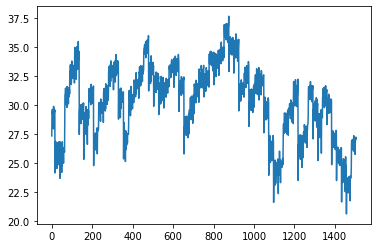

In [114]:
y_pred = Prediction(X_pred , L2_weights) #prediction using L2 loss model
#print(y_pred)
#plt.plot(np.multiply(y_pred,factor[:,0]))
print(f'max: {max(y_pred)}, min: {min(y_pred)}') #print range of prediction data
plt.plot(y_pred) #plot prediction data


Prediction with L1 model

max: 37.61123626190832, mine: 20.7854916314536


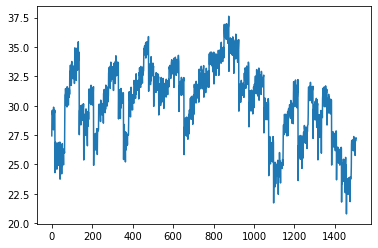

In [115]:
y_pred = Prediction(X_pred , L1_weights) #prediction using L1 loss model
#print(y_pred)
print(f'max: {max(y_pred)}, mine: {min(y_pred)}') #print range of prediction data
plt.plot(y_pred) #plot prediction data

Prediction with Pseudo Inverse (best model)

max: 37.75948427999314, min: 20.57124467365489


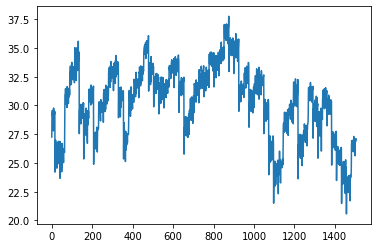

In [116]:
y_pred = Prediction(X_pred , PI_weights) #prediction using Psuedo Inverse model
#print(y_pred)
print(f'max: {max(y_pred)}, min: {min(y_pred)}') #print range of prediction data
plt.plot(y_pred) #plot prediction data

Save to .csv file

In [117]:
pred_data_write = np.append(X_pred, np.transpose(y_pred[np.newaxis]), axis=1) # Appending the ouput values in the file.
pred_data_write_df = pd.DataFrame(np.transpose(y_pred[np.newaxis])) # Creating dataframe from numpy array.
h = train.columns.values # Getting the header from given link
#pred_data_write_df.to_csv("213070056_213079013_1.csv",header=['Next_Tmax'],index=False) # Writing dataframe to csv file.

# Calculate R^2 value

In [118]:
#best model is the one with least MSE i.e. PI model
Best_model_weights = PI_weights

In [119]:
ybar = np.mean(y_test) #mean of actual test output vector
ycap = Prediction(X_test, Best_model_weights) #predicted output vector

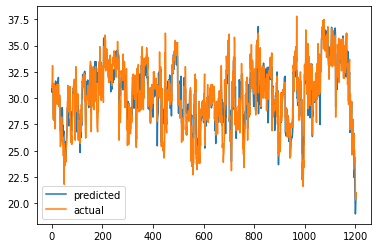

In [120]:
#plot target and predicted data

plt.plot(ycap, label = 'predicted')
plt.plot(y_test, label='actual')

plt.legend()
plt.show()

In [121]:
#coefficient of regression calculation
#formula reference: https://stackoverflow.com/questions/40901445/function-to-calculate-r2-r-squared-in-r
R_sq = np.sum((ycap - ybar)**2)/np.sum((y_test - ybar)**2)

print(R_sq)

0.7956836625152671


Hence, the R^2 value is 0.795

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
 Rahul Singh (213070052)

2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 
https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
